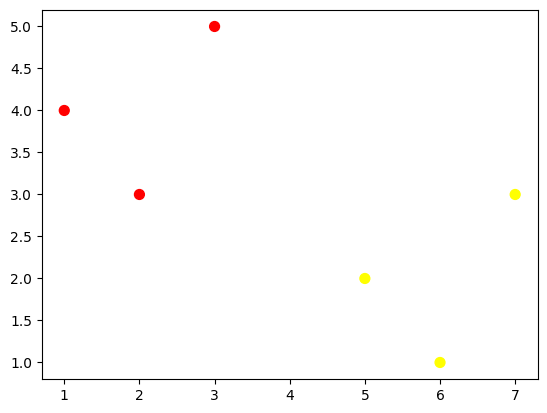

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import svm

X1 = pd.DataFrame([1, 2, 3, 5, 6 ,7])
X2= pd.DataFrame([4, 3, 5, 2, 1, 3])

X1=X1.set_axis(['X1'], axis=1)
X2=X2.set_axis(['X2'], axis=1)

X= pd.concat([X1,X2], axis=1)

y = pd.DataFrame([-1, -1, -1, 1, 1, 1])
y=y.set_axis(['y'], axis=1)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=np.ravel(y), s=50, cmap='autumn')


In [2]:
model = svm.SVC(kernel='linear', C=1)
model.fit(X, np.ravel(y))

SVC(C=1, kernel='linear')

In [9]:
# Get support vectors
support_vectors = model.support_vectors_
print("Vectores Soporte:\n", support_vectors)

# Get indices of support vectors
support_indices = model.support_
print("\nIndices de los vectores Soporte:\n", support_indices)

# Get number of support vectors for each class
num_support_vectors = model.n_support_
print("\nNumero de vectores soporte para cada clase:\n", num_support_vectors)

# Print the decision function
print("\nDecision Function:\n", model.decision_function)

# Get the coefficients of the hyperplane
w = model.coef_[0]
b = -w[0] / w[1]
print("\nCoeficientes del Hiperplano:\nw =", w, "\nb =", b)


Vectores Soporte:
 [[2. 3.]
 [3. 5.]
 [5. 2.]]

Indices de los vectores Soporte:
 [1 2 3]

Numero de vectores soporte para cada clase:
 [2 1]

Decision Function:
 <bound method BaseSVC.decision_function of SVC(C=1, kernel='linear')>

Coeficientes del Hiperplano:
w = [ 0.57119023 -0.28587318] 
b = 1.9980546114736584


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


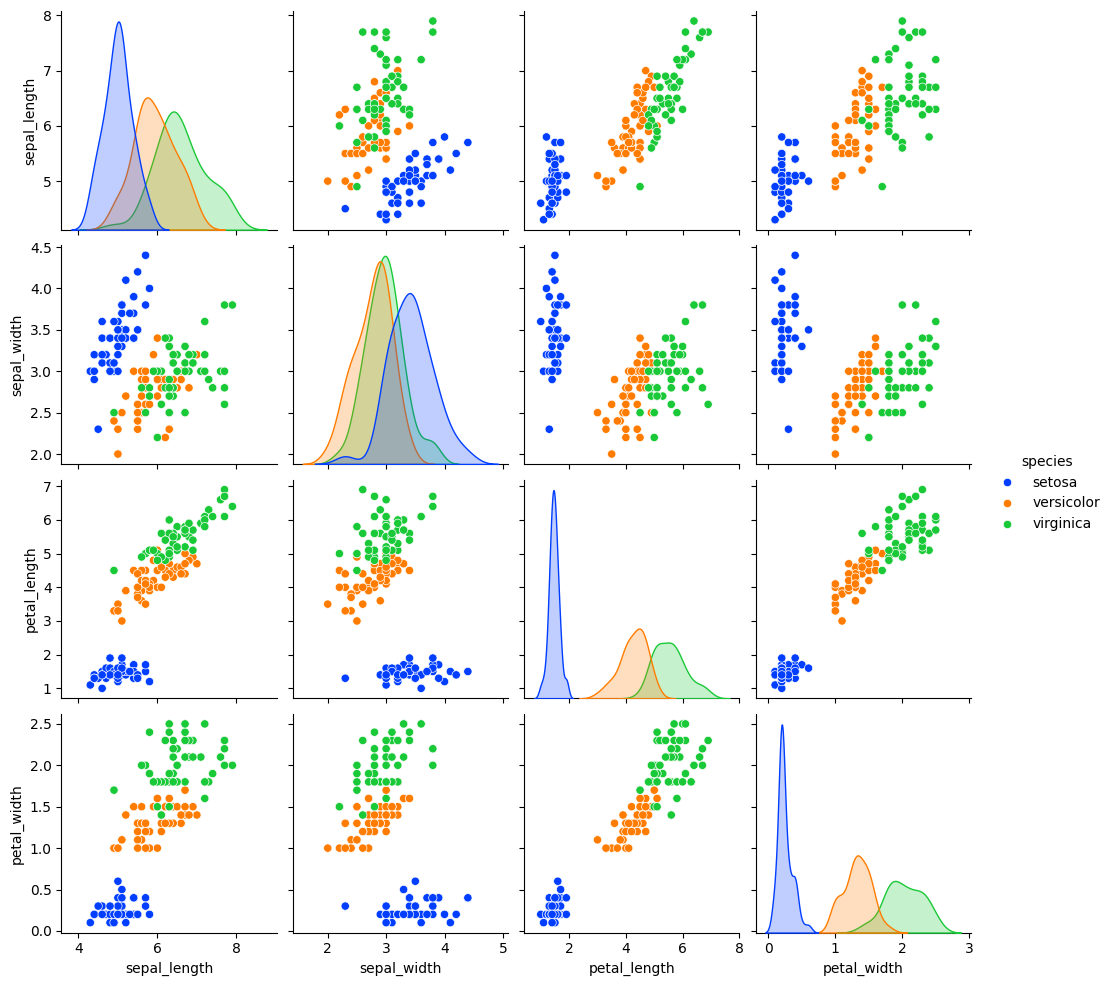

In [10]:
### visualizando SVM
import seaborn as sns
iris = sns.load_dataset("iris")
print(iris.head())
y = iris.species
X = iris.drop('species',axis=1)
sns.pairplot(iris, hue="species",palette="bright")

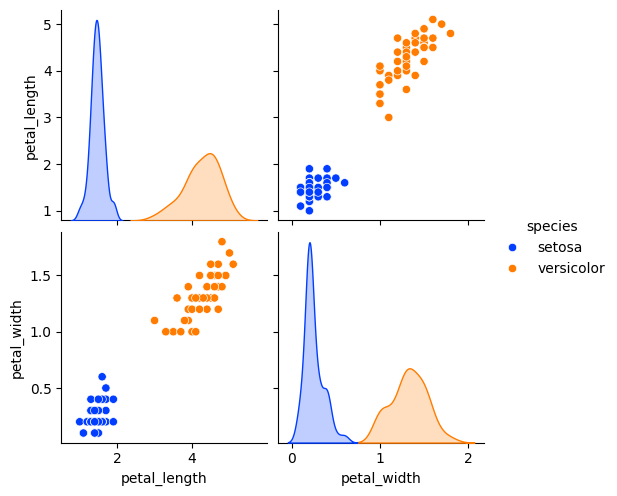

In [11]:


## para simplificar el problema quitamos la clase virginica y las variables sepal.
## Asi tenemos un problema de clasificacion de dos clases con dos variables que podemos visualizar


df=iris[(iris['species']!='virginica')]
df=df.drop(['sepal_length','sepal_width'], axis=1)
df.head()

sns.pairplot(df, hue="species",palette="bright")

<ipython-input-12-24729eed193c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace('versicolor', 1)


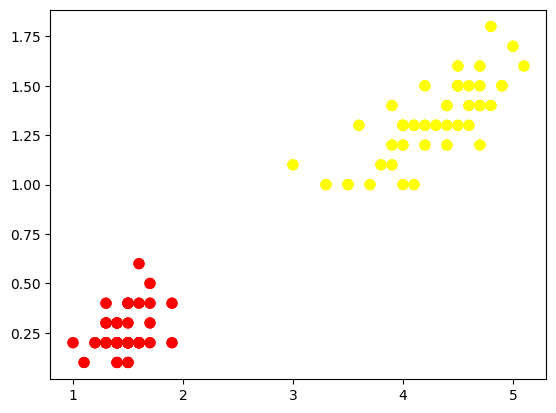

In [12]:


#let's convert categorical values to numerical target
df=df.replace('setosa', 0)
df=df.replace('versicolor', 1)
X=df.iloc[:,0:2]  ## para coger las dos primeras columnas
V=df[['petal_length', 'petal_width']] ## otra manera de coger las dos columnas


y=df['species']
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(df[['petal_length']], df[['petal_width']] , c=y, s=50, cmap='autumn') ## con la V

In [13]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

In [14]:

support_vectors = model.support_vectors_
print("Vectores Soporte:\n", support_vectors)

support_indices = model.support_
print("\nIndices de los vectores Soporte:\n", support_indices)


num_support_vectors = model.n_support_
print("\nNumero de vectores soporte para cada clase:\n", num_support_vectors)


print("\nDecision Function:\n", model.decision_function)

# Get the coefficients of the hyperplane
w = model.coef_[0]
b = -w[0] / w[1]
print("\nCoeficientes del Hiperplano:\nw =", w, "\nb =", b)

Vectores Soporte:
 [[1.9 0.4]
 [3.  1.1]]

Indices de los vectores Soporte:
 [44 98]

Numero de vectores soporte para cada clase:
 [1 1]

Decision Function:
 <bound method BaseSVC.decision_function of SVC(C=1, kernel='linear')>

Coeficientes del Hiperplano:
w = [1.1 0.7] 
b = -1.5714285714285714


In [15]:
print('1.1 * petal_length + 0.7 * petal_width - 1.5714285714285714 > 0 versicolor')

1.1 * petal_length + 0.7 * petal_width - 1.5714285714285714 > 0 versicolor


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


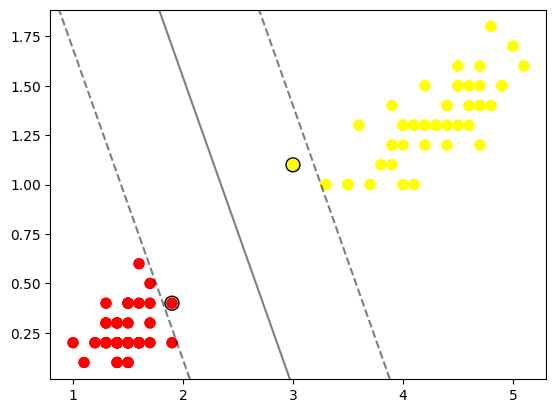

In [16]:

#######################################
########### VISUALIZACION NUMERO 1

## los pintamos para visualizarlos
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])
### hiperplano separador

ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
xlim = ax.get_xlim() ## limites de la variable x
ylim = ax.get_ylim() ## ## limites de la variable y

xx = np.linspace(xlim[0], xlim[1], 30) ## dividimos el espacio de la x en 30 partes iguales
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[1.9, 0.4],
       [3. , 1.1]])

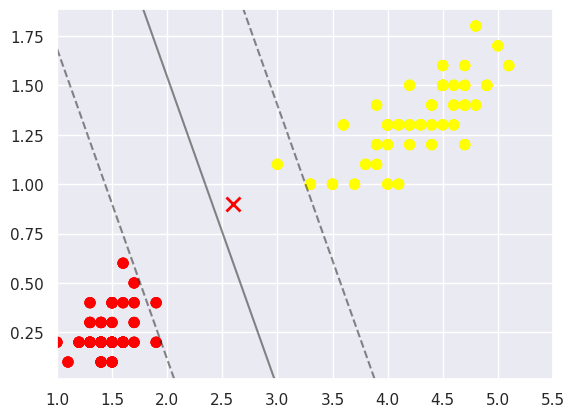

In [17]:
############### VISUALIZACION NUMERO 2
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

### pintamos hiperplanos a mano

xfit = np.linspace(1, 6)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.plot([2.6], [0.9], 'x', color='red', markeredgewidth=2, markersize=10) # el punto que aparece con la x

#for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
#    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(1, 5.5);

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

model.support_vectors_

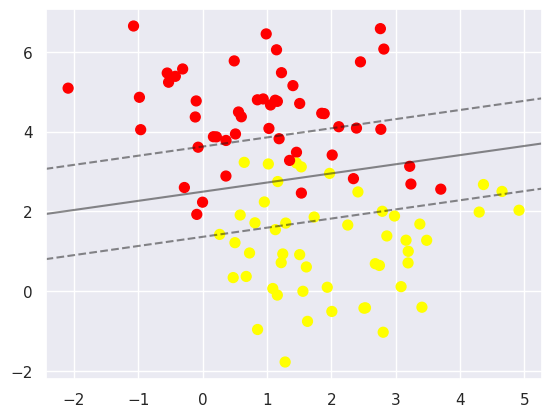

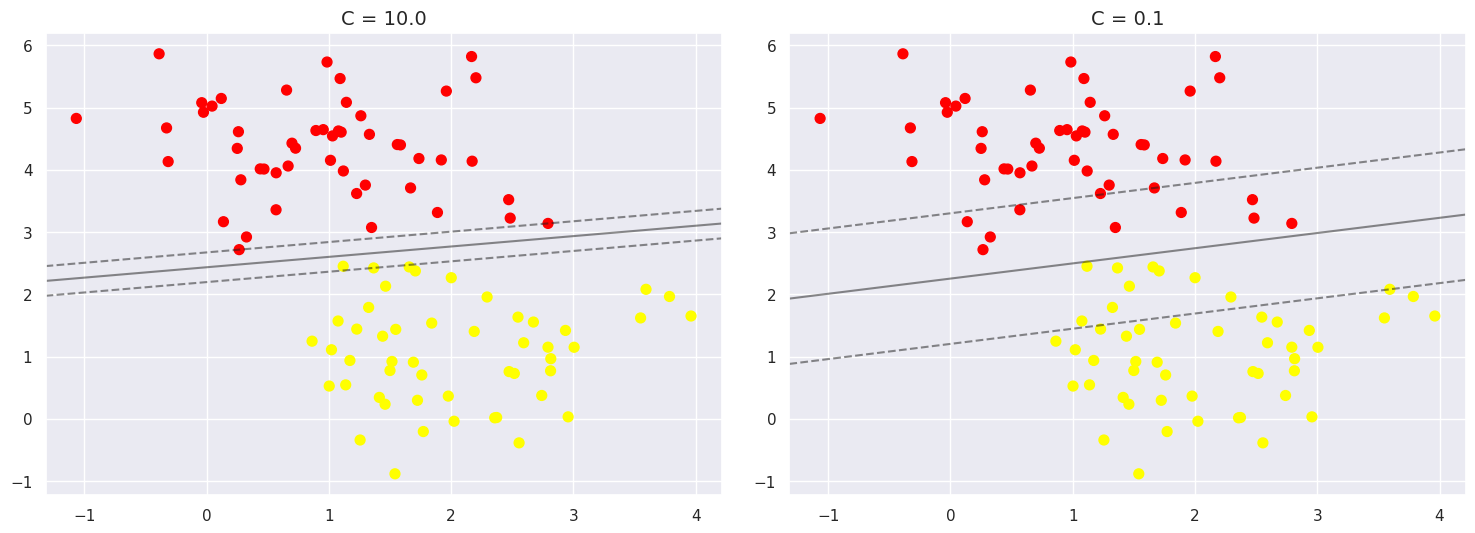

In [18]:

#### SOFT MARGIN, el efecto de el parametro C

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')


clf = SVC(kernel='linear', C=0.1).fit(X, y)

plot_svc_decision_function(clf, plot_support=False);

###### SOFT COST
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)



## pipeline

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC())


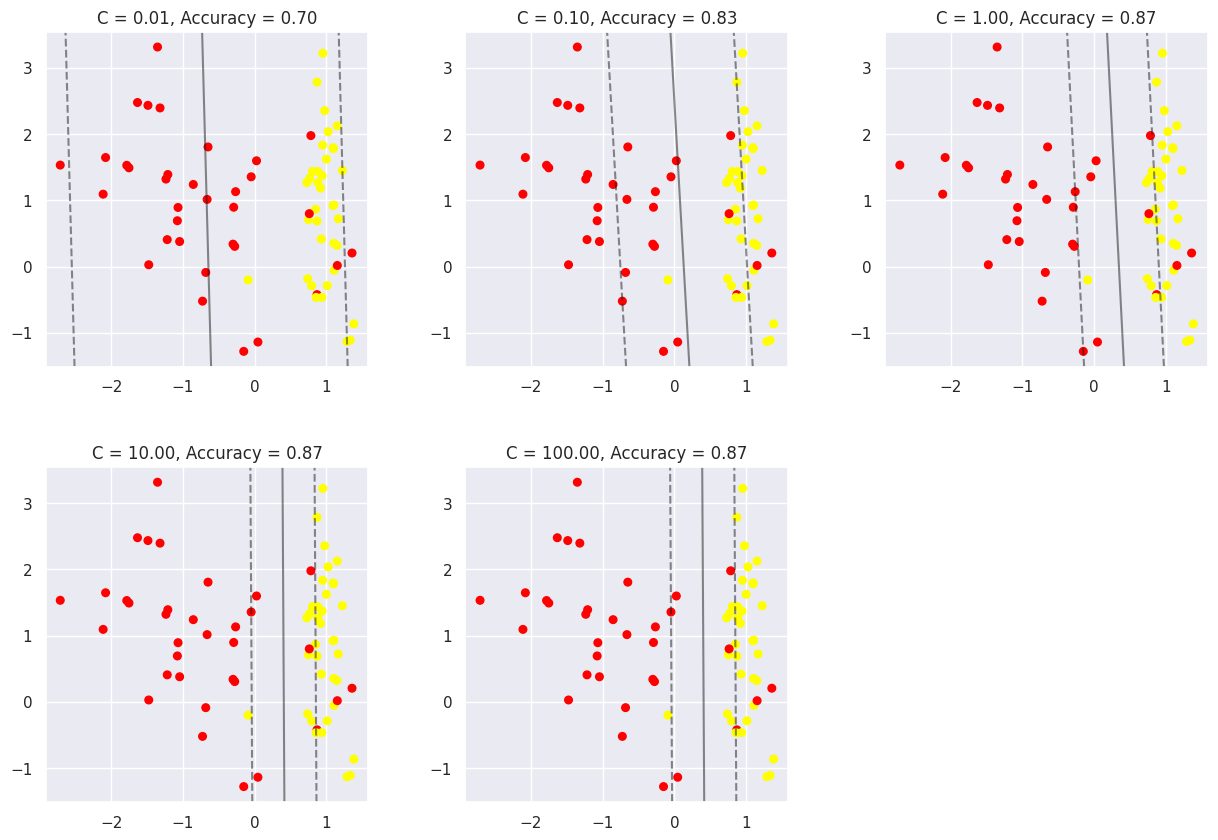

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate sample data with some overlap
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1, random_state=0)

# Define C values to explore
C_values = [0.01, 0.1, 1, 10, 100]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
axes[-1, -1].axis('off')  # Hide the last subplot

# Iterate through C values
for ax, C in zip(axes.flatten()[:-1], C_values):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Train SVM model
    model = SVC(kernel='linear', C=C).fit(X_train, y_train)

    # Plot decision boundary and data points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap='autumn')
    plot_svc_decision_function(model, ax)

    # Calculate and display accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    ax.set_title(f'C = {C:.2f}, Accuracy = {accuracy:.2f}')

plt.show()